## Capstone Project : Healthcare - NIDDK Diabetes Classification 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Approach:

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values? 

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 
a)	Pie chart to describe the diabetic/non-diabetic population
b)	Scatter charts between relevant variables to analyse the relationships
c)	Histogram/frequency charts to analyse the distribution of the data
d)	Heatmap of correlation analysis among the relevant variables
e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np

In [2]:
# loading file from local
file_path = 'C:/Users/abhin/Desktop/Projects_files/Data-Science-Capstone-Projects-master/Data-Science-Capstone-Projects-master/Project_2/Project 2/Healthcare - Diabetes/health_care_diabetes.csv'
df = pd.read_csv(file_path)

### Data Exploration

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Descriptive Statistics

Note that the Glucose, BP, ST, Insulin and BMI features can't have zero values in real life. So, this concludes that there are missing/ irrelevant values which must be treated for us to continue witht the Data exploration step. 

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Missing Value Treatment

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The function returns possibilty of no NAN values. However, there might be missing values reperesented as zero values in the dataset. So, treatment of unreasonable zero values must be done.

In [9]:
# Counting zeroes in dataset
for col in df.columns:
    try:
        print(col, ": {}".format(df[col].value_counts()[0]))
    except:
        print(col, " : No zero values here.")

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction  : No zero values here.
Age  : No zero values here.
Outcome : 500


In [11]:
# Checking mode for suitable imputer
df.mode().iloc[0]

Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age                         22.000
Outcome                      0.000
Name: 0, dtype: float64

So, we'll treat all the missing values with mean imputation for Glucose, BP, ST, Insulin and BMI features.

#### Mean Imputation 

In [12]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns:
    mean = df[col].mean()
    df[col] = df[col].replace(0,mean)
        
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [13]:
# Updated Statistics post missing-value treatment
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Exploration using Histograms 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib Inline
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'Counts: Glucose')

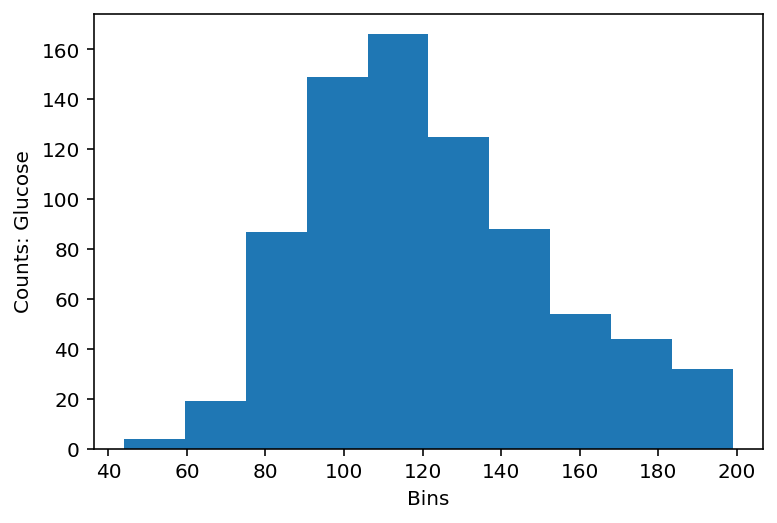

In [15]:
# Histogram
plt.hist(x = df['Glucose'])
plt.xlabel('Bins')
plt.ylabel('Counts: Glucose')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

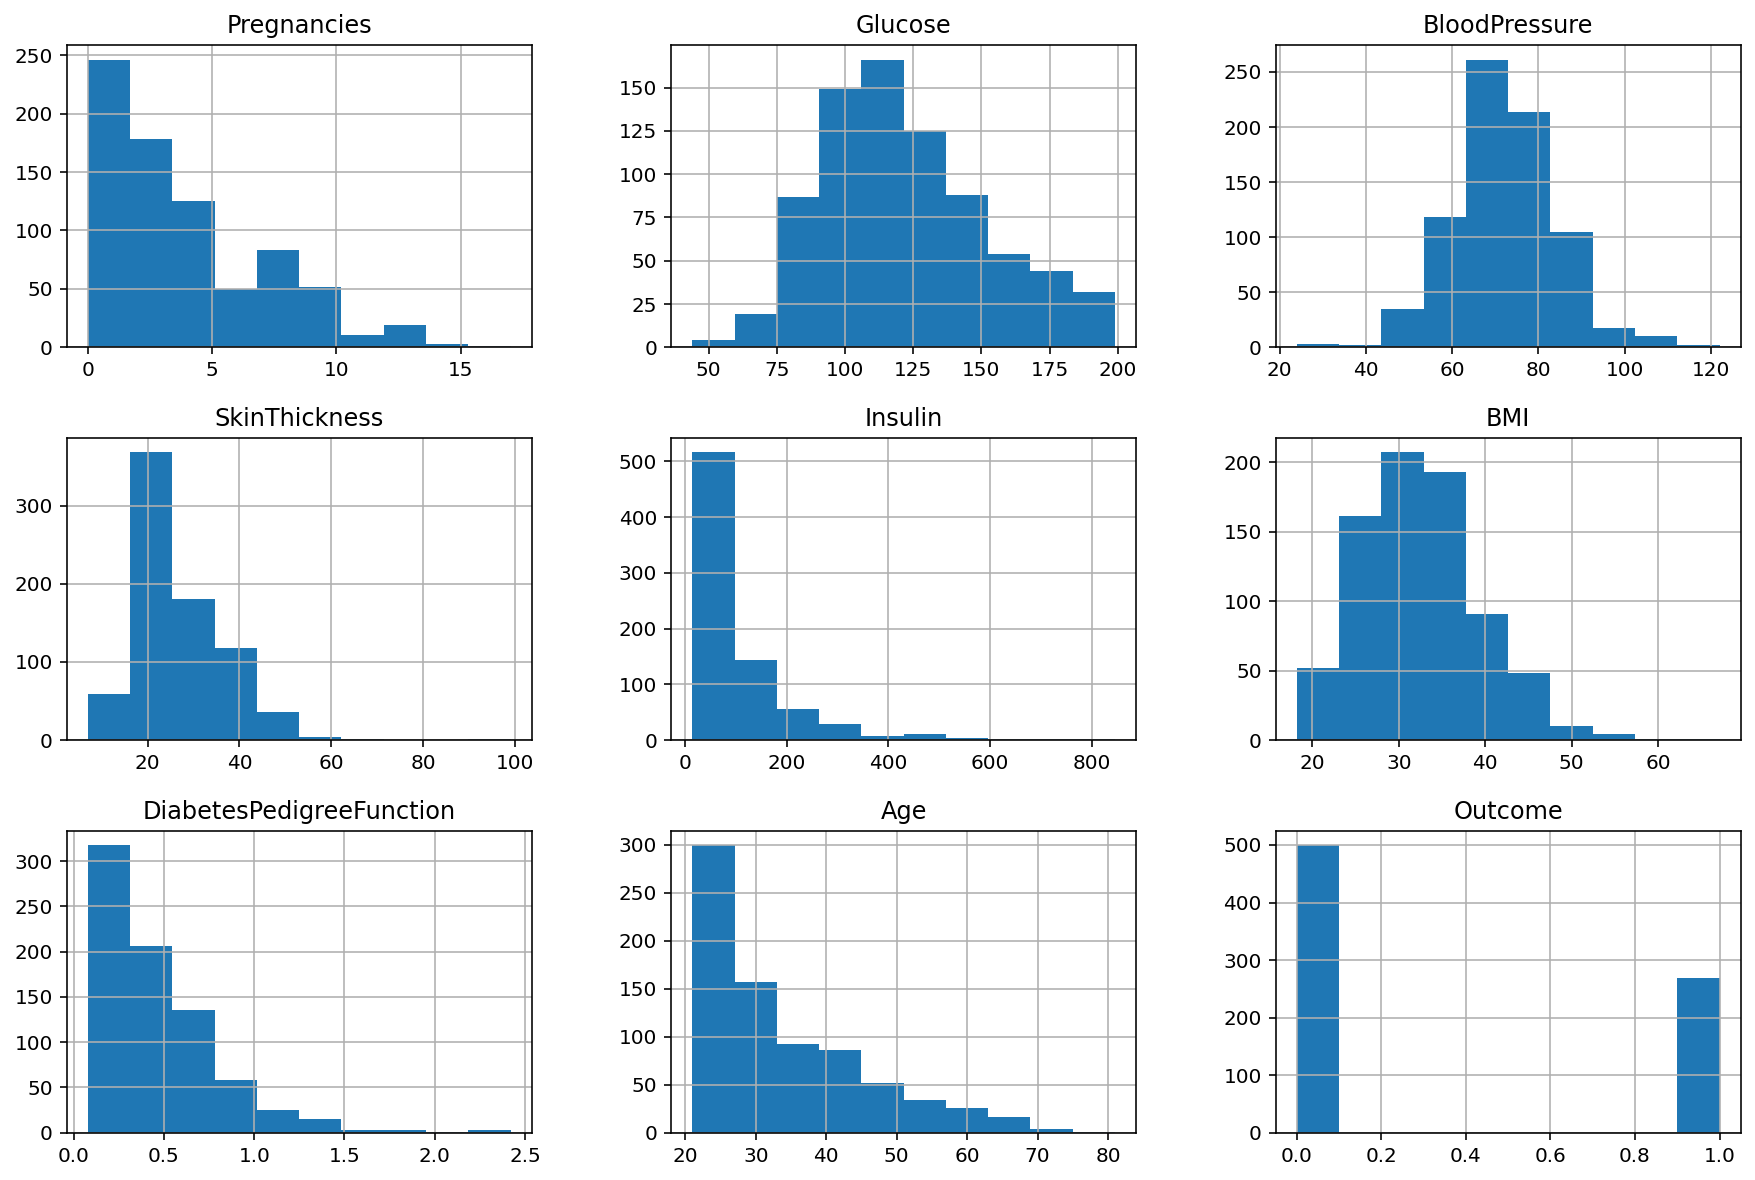

In [16]:
df.hist(figsize=(15,10))

### Count (frequency) plot describing the data types and the count of variables

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [40]:
# To view data types of each feature in df form
x = pd.DataFrame(df.dtypes, columns = ['Types'])
print(x)

                            Types
Pregnancies                 int64
Glucose                   float64
BloodPressure             float64
SkinThickness             float64
Insulin                   float64
BMI                       float64
DiabetesPedigreeFunction  float64
Age                         int64
Outcome                     int64


In [19]:
# Converting types into string types
x['Types'] = x['Types'].apply(str)
x

,Types
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Types', ylabel='count'>

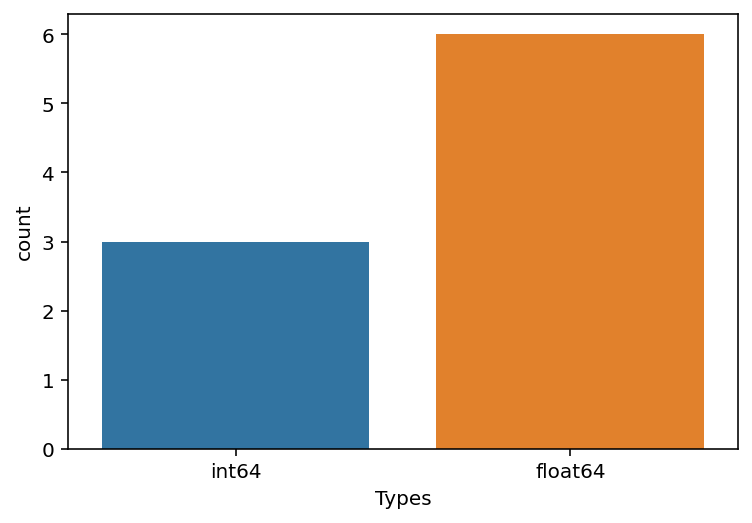

In [20]:
# Countplot for Data types 
sns.countplot(x.Types)

### Countplot for Outcomes by value

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

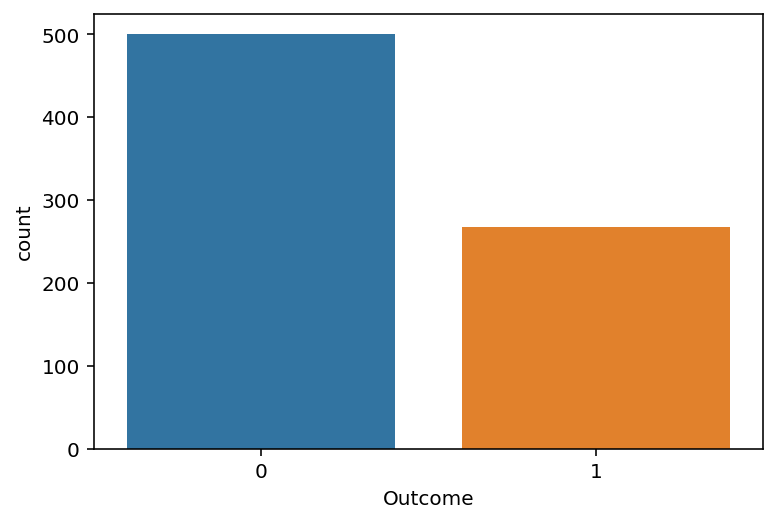

In [21]:
# Countplot for Target : Outcome  
sns.countplot(df.Outcome)

Findings from the above countplot: 
1. Above classification problem has a mild case of data imbalance with approx. 34% of Minority Positive class present when compared to the Majority negative class. 
2. Majority Class : Negative class(Outcome = 0) and Minority class: Positive class (Outcome = 1)

Since the presence of an imbalanced dataset may lead to reduced probabilities of occurence of the Minority class, it becomes essential to treat the existing dataset by using approaches such as Undersampling, Oversampling or a combination of both to achieve a balanced dataset with equal probabilities of both the classes in a binary classification problem.

In this problem, we will be using a combination of both techniques to eliminate data imbalance.


### Imbalanced data treatment technique using a combo of Oversampling and Undersampling with pipeline

In [23]:
# Importing necessary resampling libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
# Creating X and y values from the dataframe df
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [25]:
# Defining pipeline for using Combination of RandomUnderSampler and SMOTE techniques for resampling the dataset
over = SMOTE(sampling_strategy= 'auto')
under = RandomUnderSampler(sampling_strategy= 'auto')
steps = [('o', over), ('u', under)]    # ('model', model)]
pipeline = Pipeline(steps=steps)

# resampled features and response created
X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [26]:
# We can see that the ranges of each feature vary largely, due to which we must scale the data in a single scale so that
# the predictions are not haphazard in nature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

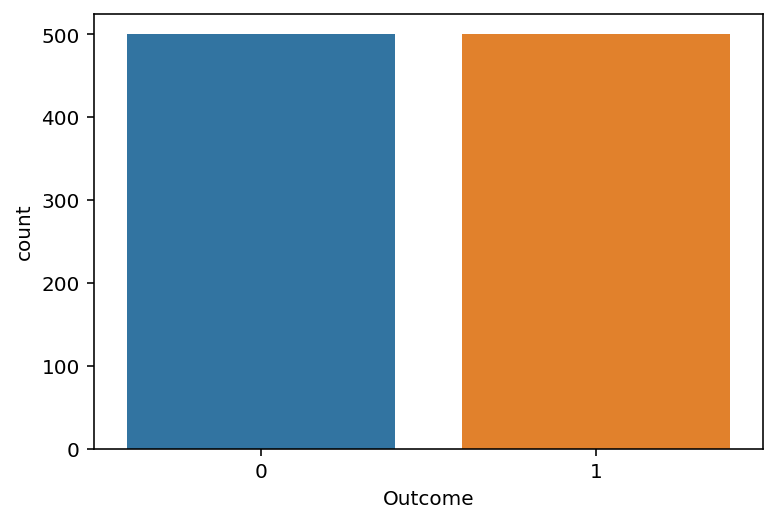

In [27]:
# The final dataset is resampled with a balance of both Outcomes (0,1)
sns.countplot(y_resampled)

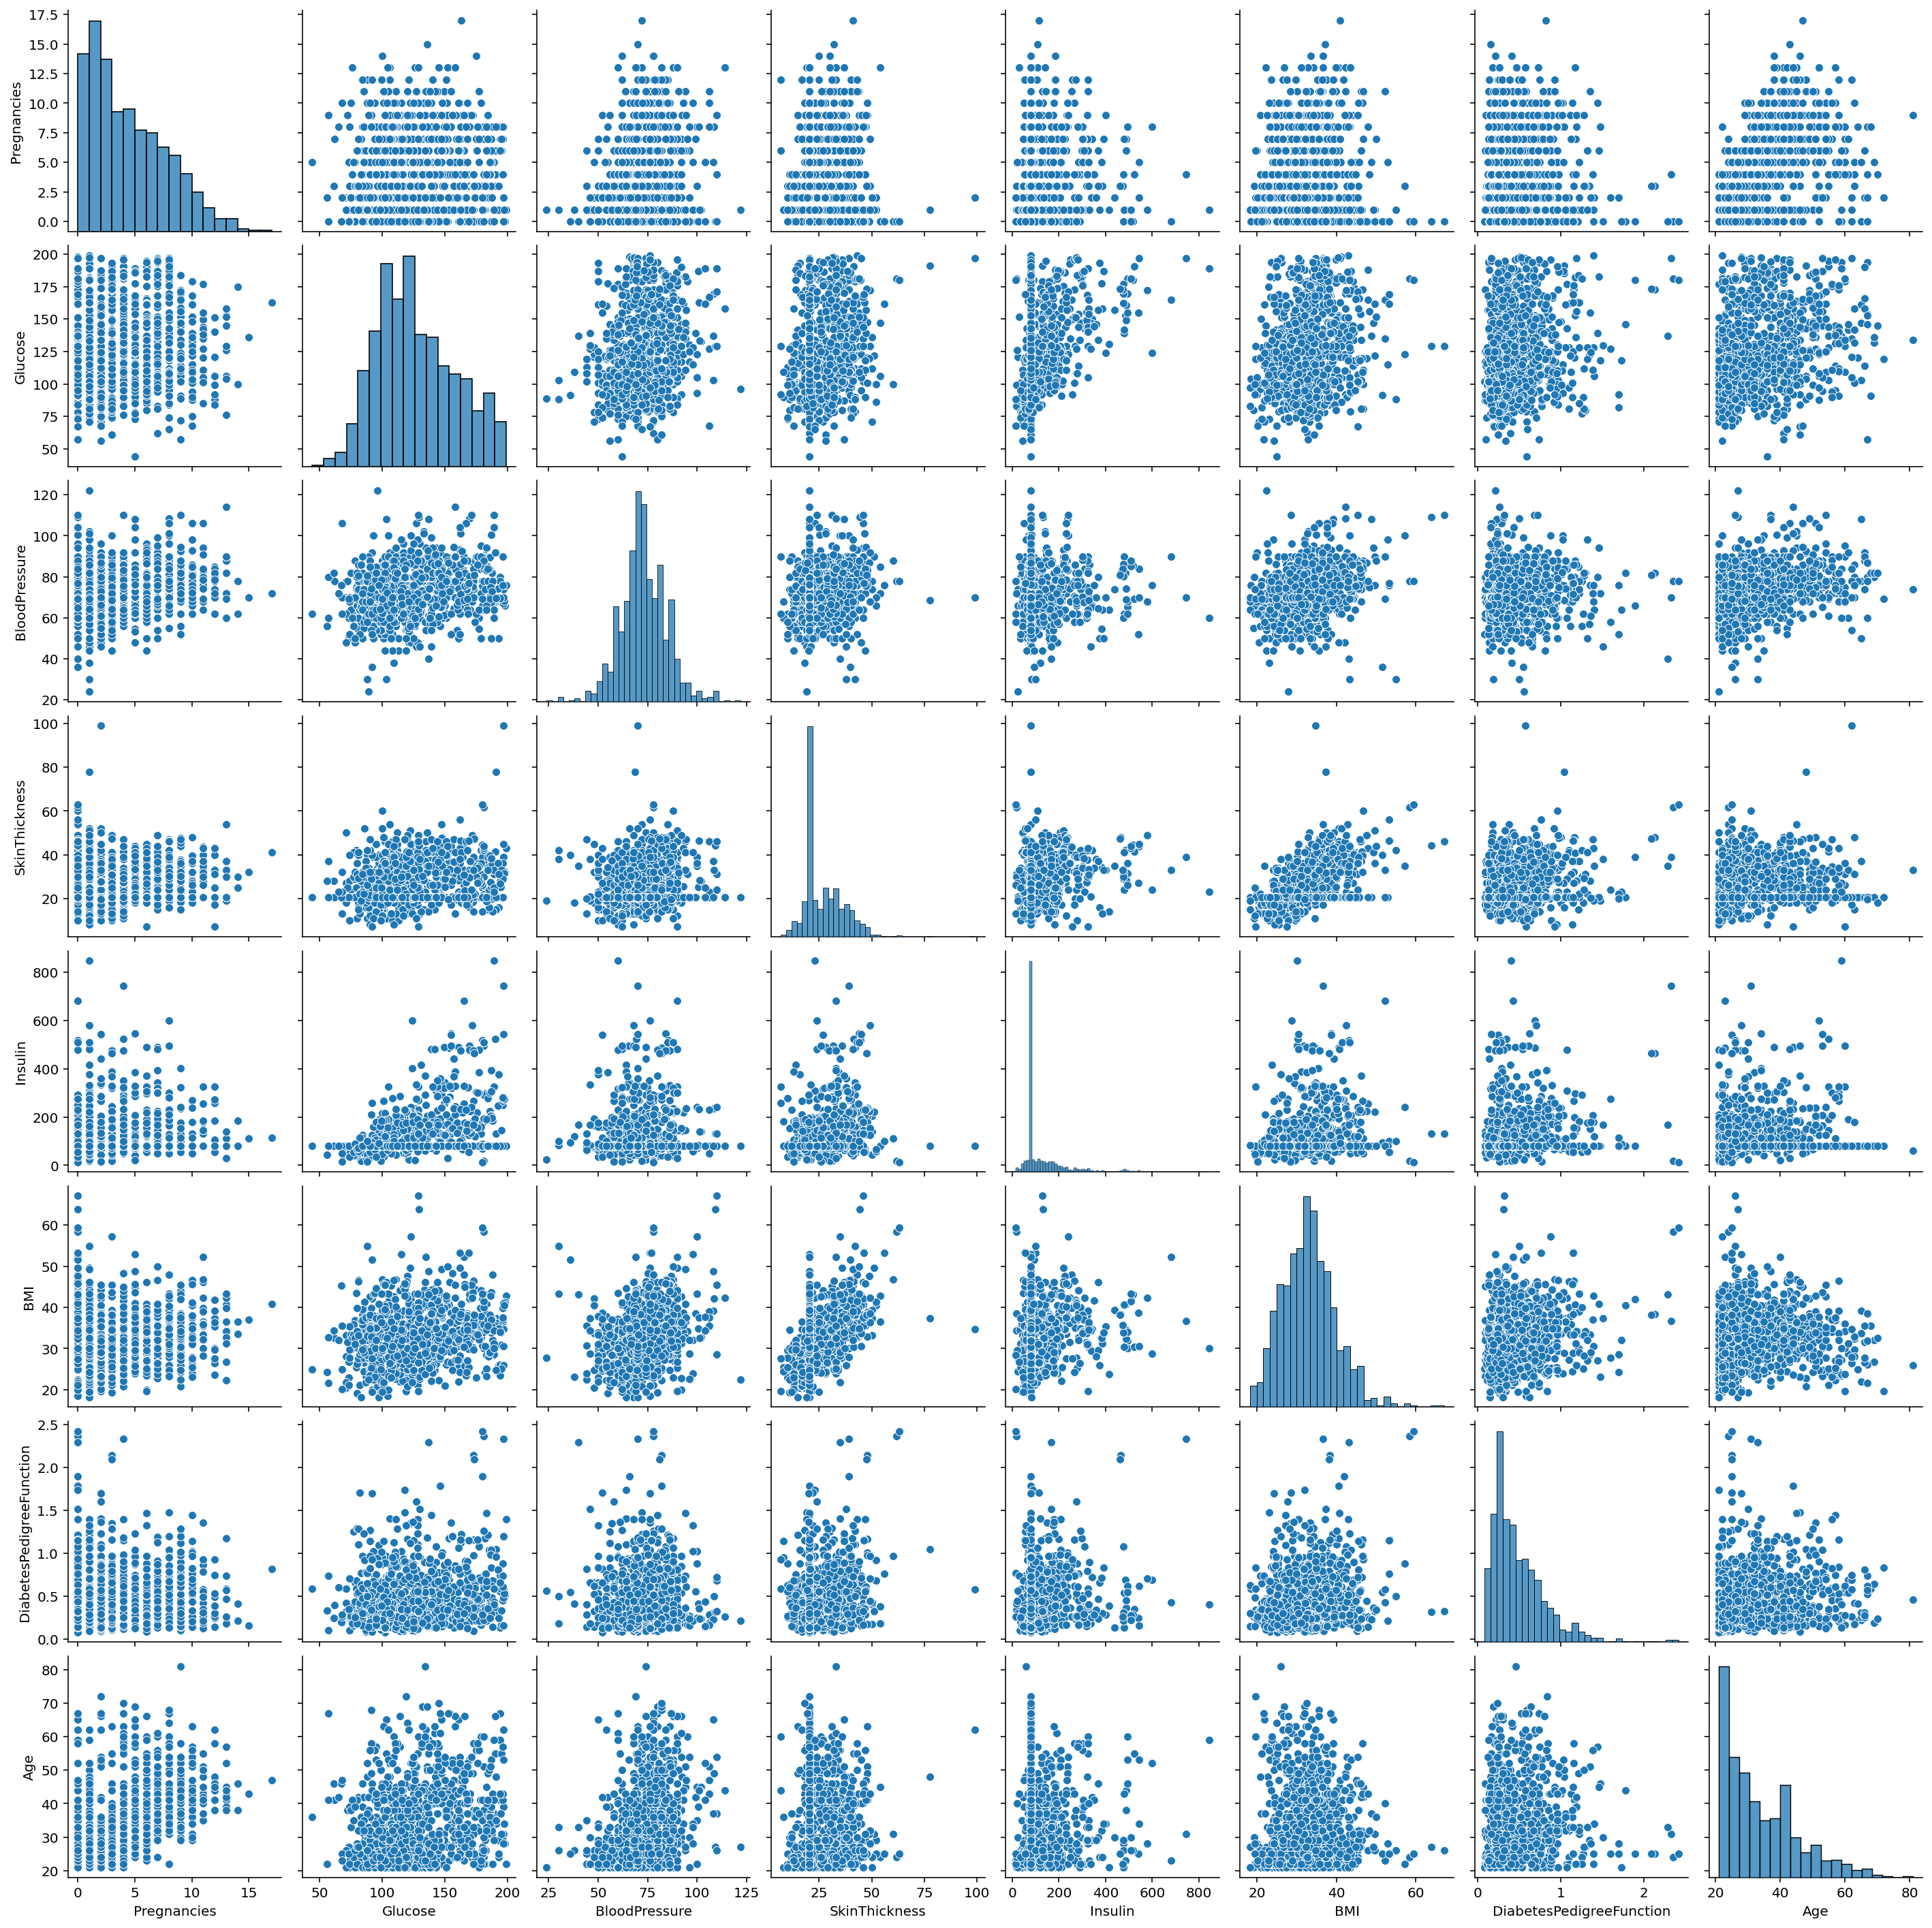

In [28]:
# The pairplot shows the relationships between features of the dataset
sns.pairplot(X_resampled)

In [29]:
# Correlations Table for features
X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.105069,0.215232,0.016349,-0.005747,-0.012006,-0.042543,0.539971
Glucose,0.105069,1.000000,0.220858,0.160018,0.393942,0.222949,0.145774,0.255051
BloodPressure,0.215232,0.220858,1.000000,0.141109,0.033536,0.268570,0.008029,0.340280
SkinThickness,0.016349,0.160018,0.141109,1.000000,0.284045,0.540272,0.185583,0.026904
Insulin,-0.005747,0.393942,0.033536,0.284045,1.000000,0.180317,0.116366,0.046628
BMI,-0.012006,0.222949,0.268570,0.540272,0.180317,1.000000,0.181262,0.001539
DiabetesPedigreeFunction,-0.042543,0.145774,0.008029,0.185583,0.116366,0.181262,1.000000,0.016420
Age,0.539971,0.255051,0.340280,0.026904,0.046628,0.001539,0.016420,1.000000


<AxesSubplot:>

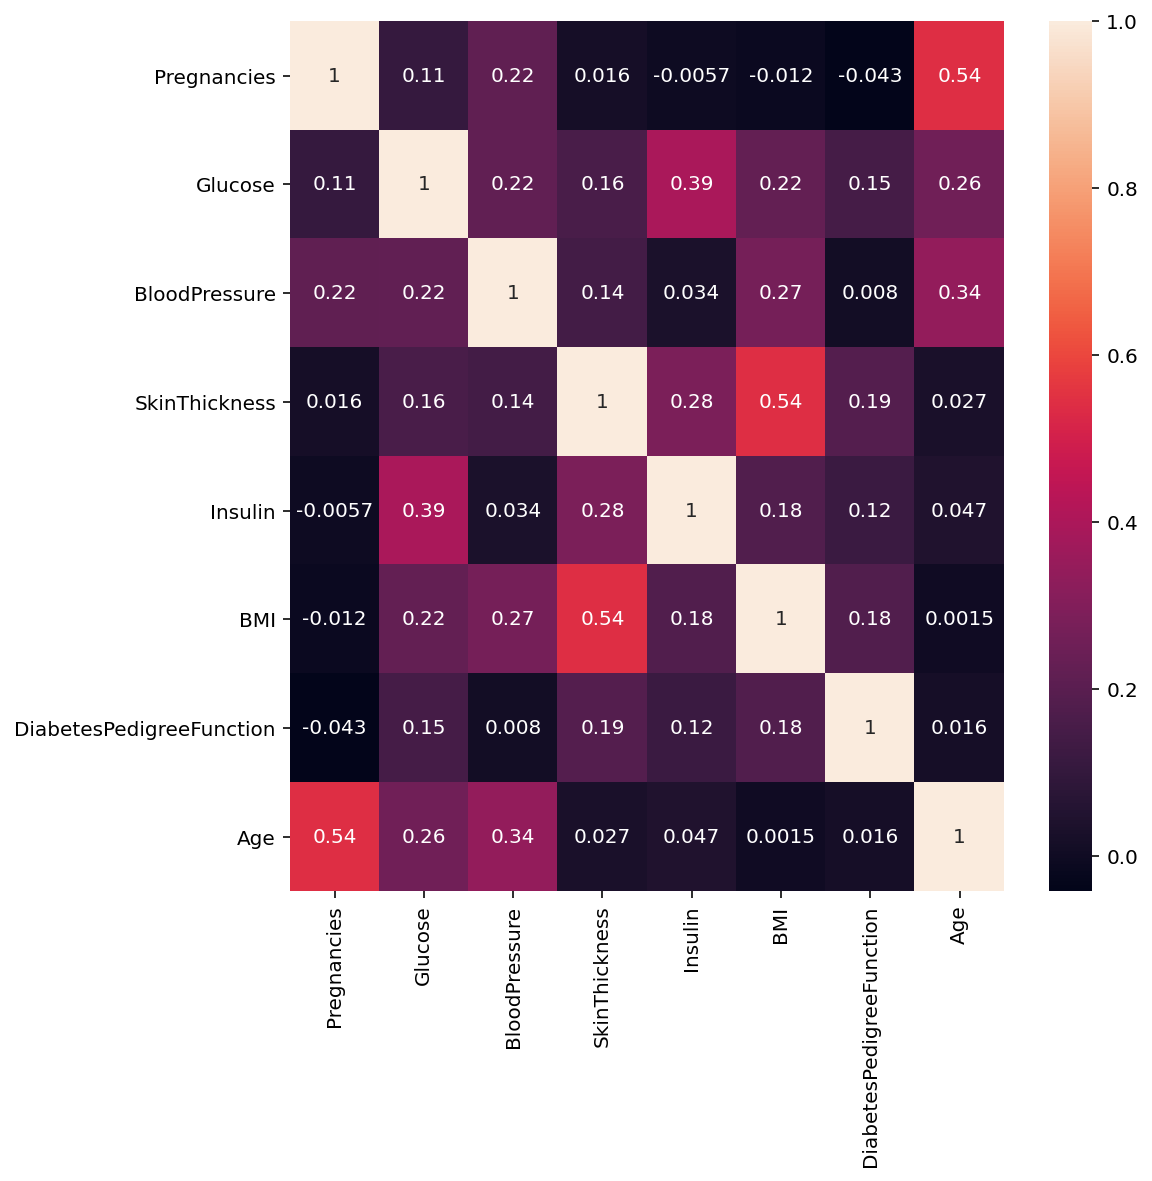

In [30]:
# HeatMap for features
fig, ax = plt.subplots(figsize=(8,8))       
sns.heatmap(X_resampled.corr(),annot= True)

The above Pairplot and the Heatmap clearly show the correlation among the features. 
We can observe that the maximum positive correlation observed is between Preganancies and Age features viz. 54.4 % while the 2nd highest is observed between BMI and BloodPressure of about 53%. On the other hand, the maximum negative correlation is observed between DiabetesPedigreeFunction and Pregnancies viz. -3.3%. By observing the relationships, we can conclude that the features in the dataset are not highly correlated and are suitable for the next step of Model building.

### Model Building and Metrics Calculation

Since the dataset is now balanced for both the classes (Target : Outcome ), we can go ahead with model building step. 

To create a proper model we should make use of cross-validation techniques so as to avoid model overfitting to the training set. Cross-validation is a crucial step in model building as it not only helps in addressing overfitting while increasing accuracy but also makes the model generalize better on the unseen data. For this particular case, we can use Repeated-Kfold CV to train the model. The performance measure reported by k-fold cross-validation is the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data, which is a major advantage in problems where the number of samples is small.

We shall test classification algorithms such as Logistic Regression, Support Vector Machines, K-Nearest Neighbors, Decision Trees and Random Forest Classifiers for model building and the one with the highest metrics score will be chosen as the model for predictions for this project.

In [31]:
# Importing the necessary libraries for algorithms, cross-validation and accuracy metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from numpy import mean

In [32]:
# Models instantiated with params
logreg = LogisticRegression()
svc = SVC(probability= True)
knn = KNeighborsClassifier(n_neighbors=7)
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=12)

# setting cross-validation frame for improved metric score
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# lists for final Models Comparison df
ls = ['logreg', 'svc', 'knn', 'dtc', 'rfc']
ls_acc = []
ls_sns = []
ls_spc = []

Statistics for logreg:

ROC AUC score for the LogisticRegression model: 84.646 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       500
           1       0.78      0.74      0.76       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000

AUC: 0.846

Confusion Matrix : 
 [[393 107]
 [130 370]]
Accuracy : 76.300  %
Sensitivity :  0.786
Specificity :  0.74


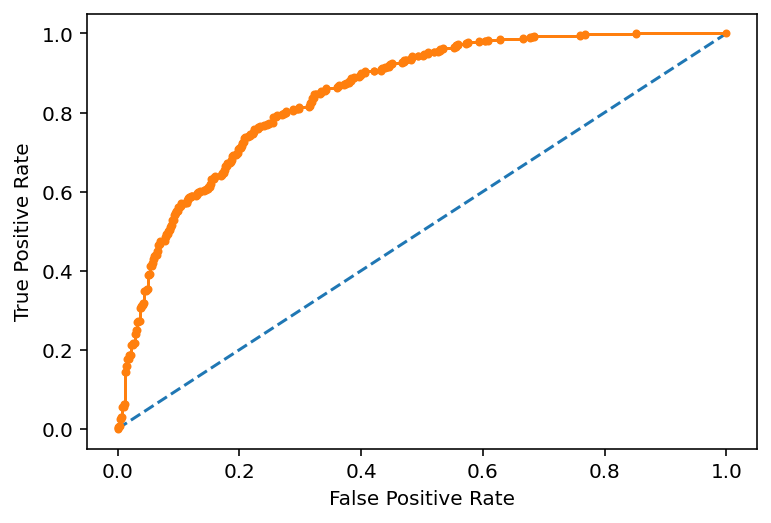

In [33]:
# Evaluating LogisticRegression() model
print("Statistics for logreg:\n")
scores = cross_val_score(logreg, X_scaled, y_resampled, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores) *100
print('ROC AUC score for the LogisticRegression model: %.3f' % score,'%')

# Classification report 
y_pred = cross_val_predict(logreg, X_scaled, y_resampled, cv=10)
print("\nClassification Report: \n",classification_report(y_resampled, y_pred))

# For generating ROC-AUC Curve 
# predicting probabilities
probs = cross_val_predict(logreg, X_scaled, y_resampled, cv=10, method = 'predict_proba')
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_resampled, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_resampled, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Confusion Matrix, Accuracy, Sensistivity and Specificity
cm = confusion_matrix(y_resampled, y_pred) 
print('\nConfusion Matrix : \n', cm)
total=sum(sum(cm))

# Calculate accuracy
# Accuracy = (TP + TN) / All Predictions
# Sensitivity (Recall) = TP / (FN + TP)
# Specificity = TN / (TN + FP)

accuracy=((cm[0,0]+cm[1,1])/total)*100
print ('Accuracy : %.3f '% accuracy, '%')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# Appending respective lists for final comparison df
ls_acc.append(accuracy)
ls_sns.append(sensitivity)
ls_spc.append(specificity)

Statistics for svc:

ROC AUC score for the Suppor Vector Machine model: 86.775 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       500
           1       0.78      0.81      0.80       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000

AUC: 0.868

Confusion Matrix : 
 [[385 115]
 [ 93 407]]
Accuracy : 79.200  %
Sensitivity :  0.77
Specificity :  0.814


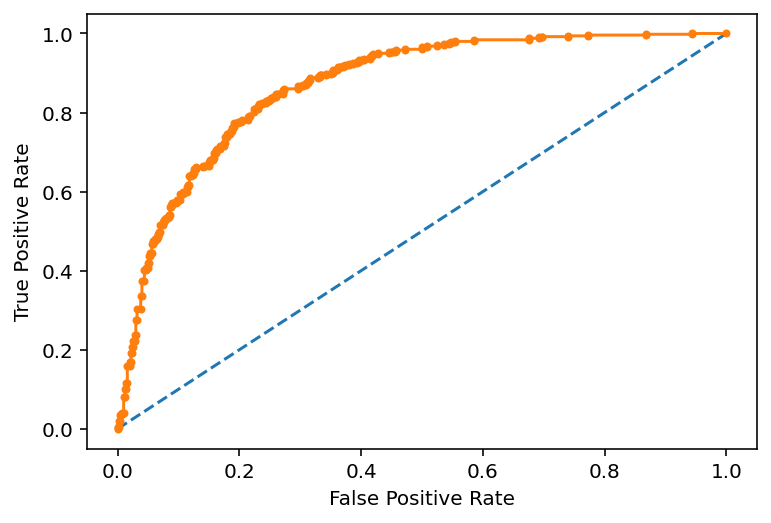

In [34]:
# Evaluating SVC() model
print("Statistics for svc:\n")
scores = cross_val_score(svc, X_scaled, y_resampled, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)*100
print('ROC AUC score for the Suppor Vector Machine model: %.3f' % score,'%')

# Classification report 
y_pred = cross_val_predict(svc, X_scaled, y_resampled, cv=10)
print("\nClassification Report: \n",classification_report(y_resampled, y_pred))

# Plotting ROC-AUC Curve 
probs = cross_val_predict(svc, X_scaled, y_resampled, cv=10, method = 'predict_proba')
probs = probs[:, 1]
auc = roc_auc_score(y_resampled, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_resampled, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Confusion Matrix, Accuracy, Sensistivity and Specificity
cm = confusion_matrix(y_resampled, y_pred) 
print('\nConfusion Matrix : \n', cm)
total=sum(sum(cm))
accuracy=((cm[0,0]+cm[1,1])/total)*100
print ('Accuracy : %.3f '% accuracy, '%')
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

ls_acc.append(accuracy)
ls_sns.append(sensitivity)
ls_spc.append(specificity)

Statistics for knn:

ROC AUC score for the KNeighborsClassifier model: 85.142 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       500
           1       0.74      0.84      0.78       500

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.77      0.77      1000

AUC: 0.849

Confusion Matrix : 
 [[353 147]
 [ 82 418]]
Accuracy : 77.100  %
Sensitivity :  0.706
Specificity :  0.836


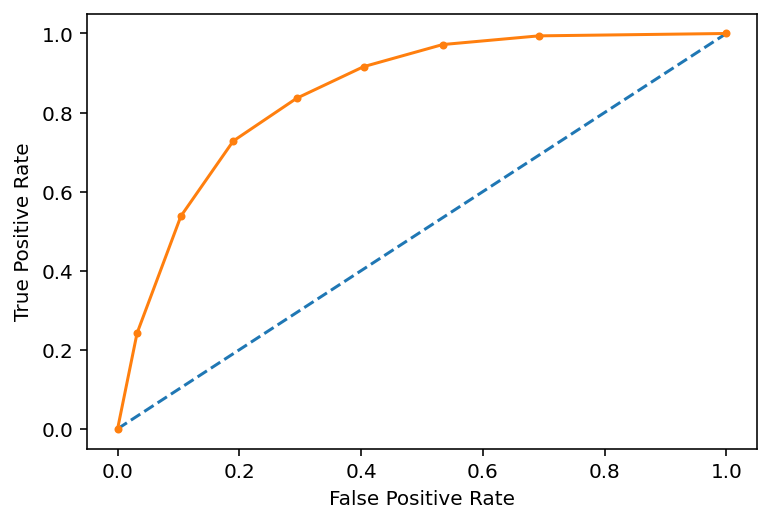

In [35]:
# Evaluating KNeighborsClassifier() model

print("Statistics for knn:\n")

scores = cross_val_score(knn, X_scaled, y_resampled, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)*100
print('ROC AUC score for the KNeighborsClassifier model: %.3f' % score,'%')

# Classification report 
y_pred = cross_val_predict(knn, X_scaled, y_resampled, cv=10)
print("\nClassification Report: \n",classification_report(y_resampled, y_pred))

# Plotting ROC-AUC Curve 
probs = cross_val_predict(knn, X_scaled, y_resampled, cv=10, method = 'predict_proba')
probs = probs[:, 1]
auc = roc_auc_score(y_resampled, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_resampled, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Confusion Matrix, Accuracy, Sensistivity and Specificity
cm = confusion_matrix(y_resampled, y_pred) 
print('\nConfusion Matrix : \n', cm)
total=sum(sum(cm))
accuracy=((cm[0,0]+cm[1,1])/total)*100
print ('Accuracy : %.3f '% accuracy, '%')
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# Appending respective lists for final comparison df
ls_acc.append(accuracy)
ls_sns.append(sensitivity)
ls_spc.append(specificity)

Statistics for dtc:

ROC AUC score for the DecisionTreeClassifier model: 82.602 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       500
           1       0.75      0.85      0.79       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

AUC: 0.837

Confusion Matrix : 
 [[357 143]
 [ 77 423]]
Accuracy : 78.000  %
Sensitivity :  0.714
Specificity :  0.846


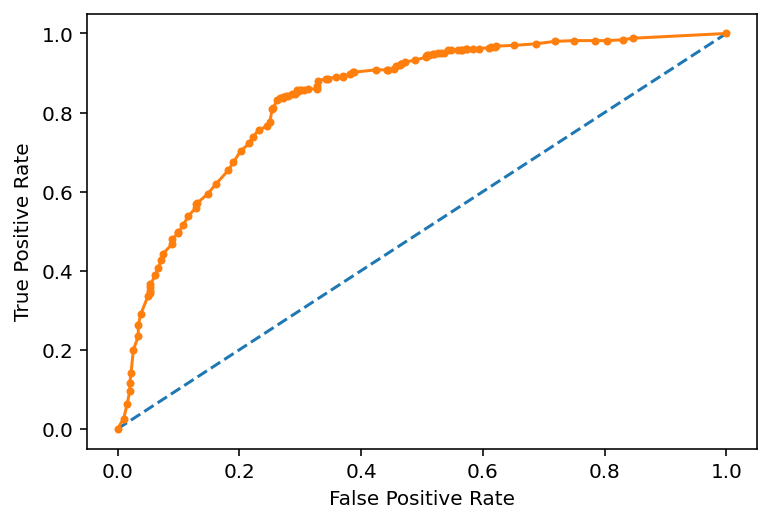

In [36]:
# Evaluating DecisionTreeClassifier() model
print("Statistics for dtc:\n")
scores = cross_val_score(dtc, X_scaled, y_resampled, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)*100
print('ROC AUC score for the DecisionTreeClassifier model: %.3f' % score,'%')

# Classification report 
y_pred = cross_val_predict(dtc, X_scaled, y_resampled, cv=10)
print("\nClassification Report: \n",classification_report(y_resampled, y_pred))

# Plotting ROC-AUC Curve 
probs = cross_val_predict(dtc, X_scaled, y_resampled, cv=10, method = 'predict_proba')
probs = probs[:, 1]
auc = roc_auc_score(y_resampled, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_resampled, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Confusion Matrix, Accuracy, Sensistivity and Specificity
cm = confusion_matrix(y_resampled, y_pred) 
print('\nConfusion Matrix : \n', cm)
total=sum(sum(cm))
accuracy=((cm[0,0]+cm[1,1])/total)*100
print ('Accuracy : %.3f '% accuracy, '%')
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# Appending respective lists for final comparison df
ls_acc.append(accuracy)
ls_sns.append(sensitivity)
ls_spc.append(specificity)

Statistics for rfc:

ROC AUC score for the RandomForestClassifier model: 87.623 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       500
           1       0.78      0.78      0.78       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

AUC: 0.876

Confusion Matrix : 
 [[388 112]
 [108 392]]
Accuracy : 78.000  %
Sensitivity :  0.776
Specificity :  0.784


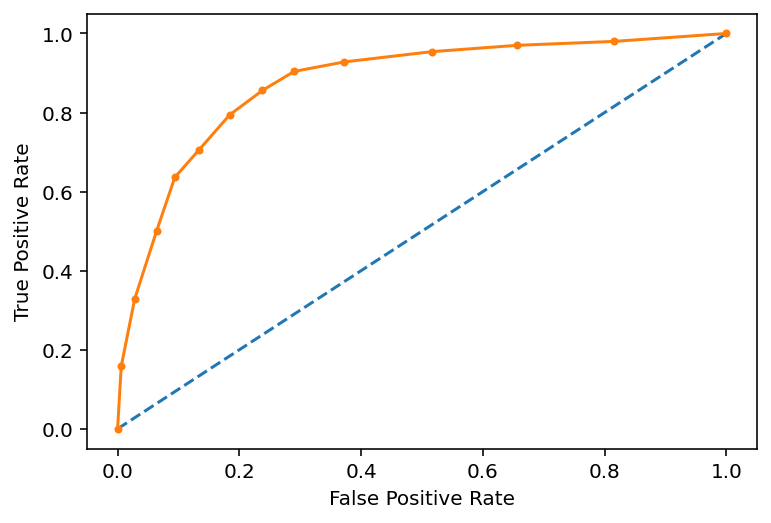

In [37]:
# Evaluating RandomForestClassifier() model
print("Statistics for rfc:\n")
scores = cross_val_score(rfc, X_scaled, y_resampled, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)*100
print('ROC AUC score for the RandomForestClassifier model: %.3f' % score,'%')

# Classification report 
y_pred = cross_val_predict(rfc, X_scaled, y_resampled, cv=10)
print("\nClassification Report: \n",classification_report(y_resampled, y_pred))

# Plotting ROC-AUC Curve 
probs = cross_val_predict(rfc, X_scaled, y_resampled, cv=10, method = 'predict_proba')
probs = probs[:, 1]
auc = roc_auc_score(y_resampled, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_resampled, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Confusion Matrix, Accuracy, Sensistivity and Specificity
cm = confusion_matrix(y_resampled, y_pred) 
print('\nConfusion Matrix : \n', cm)
total=sum(sum(cm))
accuracy=((cm[0,0]+cm[1,1])/total)*100
print ('Accuracy : %.3f '% accuracy, '%')
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# Appending respective lists for final comparison df
ls_acc.append(accuracy)
ls_sns.append(sensitivity)
ls_spc.append(specificity)

In [38]:
# Creating Final Model Comparison Dataframe
comparison_df = pd.DataFrame({'Models': ls, 'Accuracy(%)': ls_acc, 'Sensitivity': ls_sns, 'Specificity': ls_spc})
comparison_df

,Models,Accuracy(%),Sensitivity,Specificity
0,logreg,76.3,0.786,0.740
1,svc,79.2,0.770,0.814
2,knn,77.1,0.706,0.836
3,dtc,78.0,0.714,0.846
4,rfc,78.0,0.776,0.784


In [39]:
# Setting index
comparison_df.set_index('Models', inplace= True)
comparison_df

,Accuracy(%),Sensitivity,Specificity
Models,,,
logreg,76.3,0.786,0.740
svc,79.2,0.770,0.814
knn,77.1,0.706,0.836
dtc,78.0,0.714,0.846
rfc,78.0,0.776,0.784


From the above table, we can observe that RandomForestClassifier Model shows maximum accuracy (79.3 %) and Sensitivity (True Positive Rate : 0.792) but a low Specificity (True Negative Rate: 0.794), among the rest of the models. However, LogisticRegression shows minimum accuracy and specificity but a fairly higher sensitivity. Depending on the domain of the datset, we can go for the model with desired settings. Here, since it is related with a healthcare domain, we would choose a model that gives the minimal wrong positive diagnosis i.e. highest specificity value while providing a fairly good accuracy score.

Therefore, for our particular case, we will be going with the KNN model as it has highest Specificity = 0.852 and a good Accuracy = 78.4 %.

Please check Tableau Dashboard file attached for the Reporting tasks mentioned in the point #10. 